# Bike Rental - Linear Regression

### Problem statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

    Which variables are significant in predicting the demand for shared bikes.
    How well those variables describe the bike demands
    Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.
    
### Business Goal

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Import libraries

In [3118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## Read and Understand DataSet

In [3119]:
df = pd.read_csv("day.csv")

In [3120]:
df.head(20)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [3121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Data Cleaning

#### Missing Value Check
    None of the columns have any missing values. Hence missing value treatment is not required.

#### Column CleanUp - Drop columns
    instant(as it record index)
    dteday(as we have all data in other columns)
    casual and registered(as we are going to consider only cnt)

In [3122]:
df.drop(['instant','casual','registered','dteday'], axis='columns', inplace=True)

## Exploratory Data Analysis

#### Check correlation amoung features

In [3123]:
df.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-2.248195e-17,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-2.248195e-17,1.000000e+00,-2.470170e-17,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-2.470170e-17,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


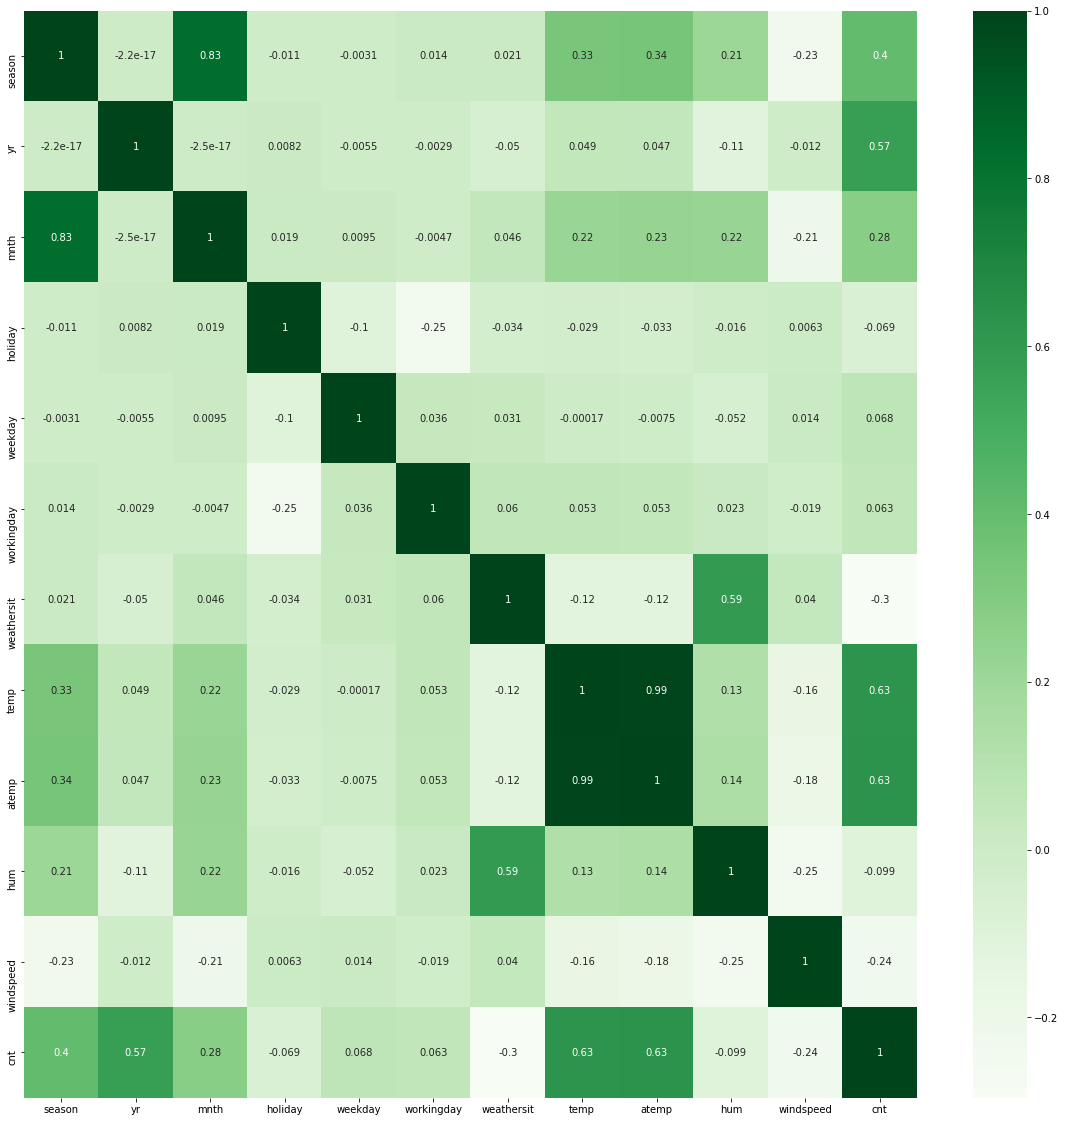

In [3124]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='Greens')
plt.show()

#### Relationship of Target variable(cnt) with independent variables 
    Positive correlation with temp, atemp, yr, season. 
    Negative correlation with windspeed.

#### Relationship between independent variables
    Humidity and weathersit
    Season and month(logical)
    Temp & atemp with season and month
    Temp and atemp are correlated.

#### Update categorical feature columns by providing meaningful categories

In [3125]:
df['season'] = df['season'].map({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})

In [3126]:
df['mnth']=df['mnth'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [3127]:
df['weekday']=df['weekday'].map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

In [3128]:
df['weathersit']=df['weathersit'].map({1:'Good',2:'Moderate',3:'Bad',4:'Worst'})

In [3129]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Sat,0,Moderate,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sun,0,Moderate,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Mon,1,Good,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tue,1,Good,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wed,1,Good,9.305237,11.46350,43.6957,12.522300,1600


## Exploratory Data Analysis on Numerical Columns

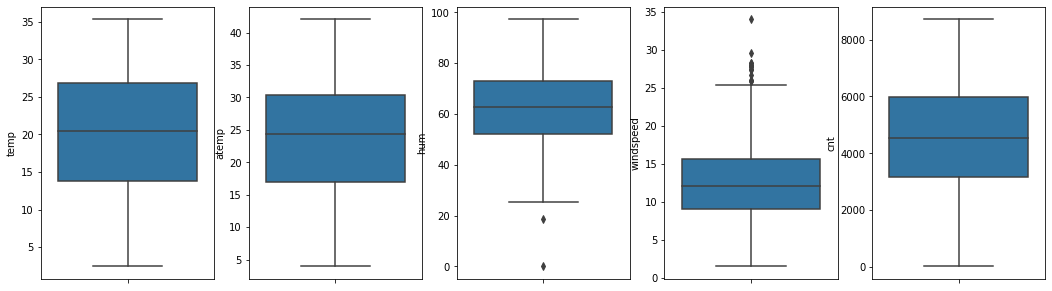

In [3130]:
cols = ['temp', 'atemp', 'hum', 'windspeed','cnt']

plt.figure(figsize=(18,5))
i = 1
for col in cols:
    plt.subplot(1,5,i)
    sns.boxplot(y=col, data=df)
    i=i+1

Comparing spread of temp and atemp on same scale.

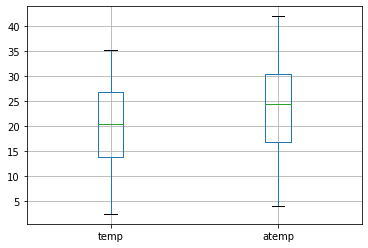

In [3131]:
df.boxplot(['temp','atemp'])

#### Observation : 
    atemp has higher percentiles as compared to temp.
    Outliers are present for humidity and windspeed columns

### Outlier Analysis & Treatment

In [3132]:
hum_lf=df['hum'].quantile(0.25)-1.5*(df['hum'].quantile(0.75)-df['hum'].quantile(0.25))
hum_lf

20.515637499999997

In [3133]:
winsp_uf=df['windspeed'].quantile(0.75)+1.5*(df['windspeed'].quantile(0.75)-df['windspeed'].quantile(0.25))
winsp_uf

25.501498124999998

In [3134]:
df.loc[df['hum'] < hum_lf,'hum']

49    18.7917
68     0.0000
Name: hum, dtype: float64

Dropping row with index 68 where the humidity is 0 as humidity can never be zero

In [3135]:
df = df.drop([df.index[68]])

In [3136]:
df.loc[df['hum'] < hum_lf,'hum']=hum_lf

In [3137]:
df.loc[df['windspeed'] > winsp_uf,'windspeed']

44     27.999836
49     34.000021
93     25.833257
94     26.000489
292    28.292425
382    27.833743
407    27.417204
420    28.250014
431    29.584721
432    27.791600
449    25.917007
665    26.666536
720    27.292182
Name: windspeed, dtype: float64

In [3138]:
df.loc[df['windspeed'] > winsp_uf,'windspeed']=winsp_uf

### PairPlot to visulaze relationship between variables

<Figure size 1440x1080 with 0 Axes>

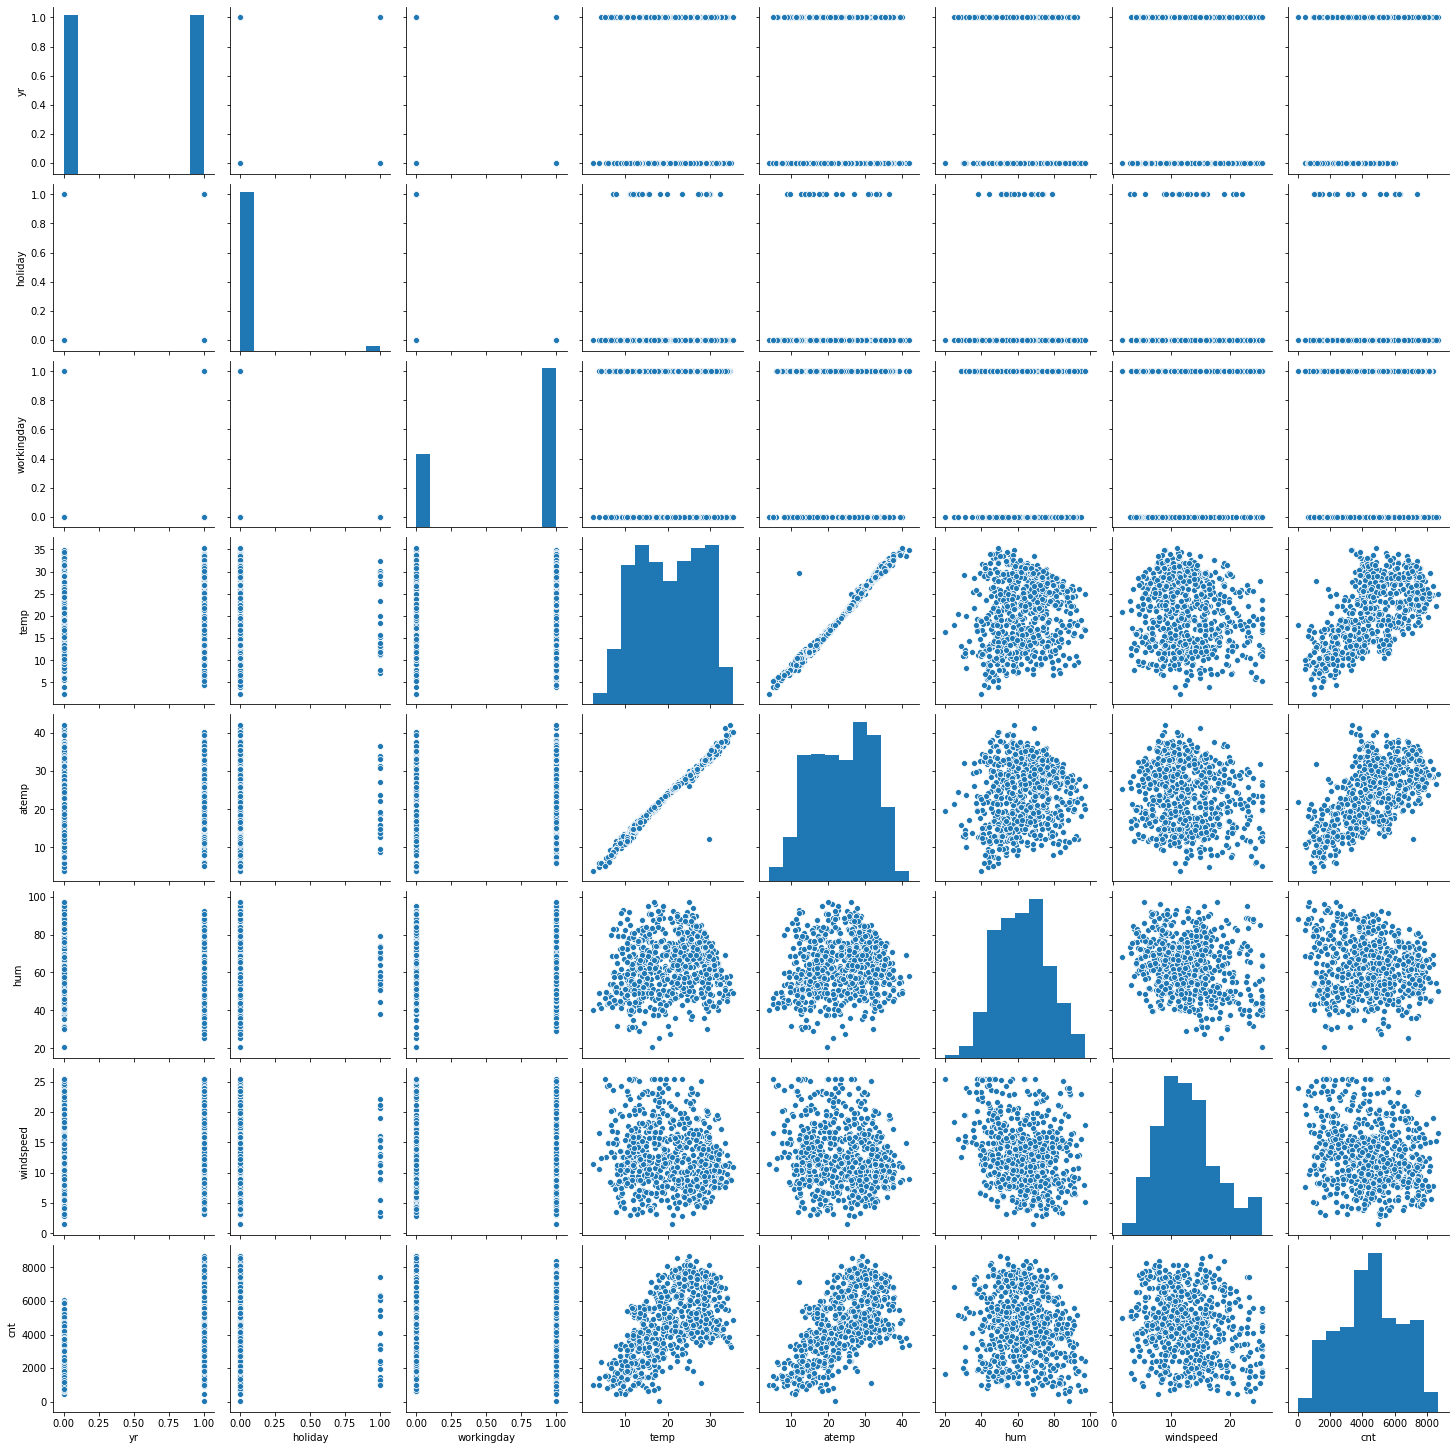

In [3139]:
plt.figure(figsize=(20,15))
sns.pairplot(df)
plt.show()

#### Observation :
    Linear relationship of temp and atemp with target variable cnt
    Strong linear relationship between temp and atemp, as we had observed high correlation between these two in heatmap.
Let's further visulaze these using regplot

### RegPlots on numerical columns against target variable cnt.

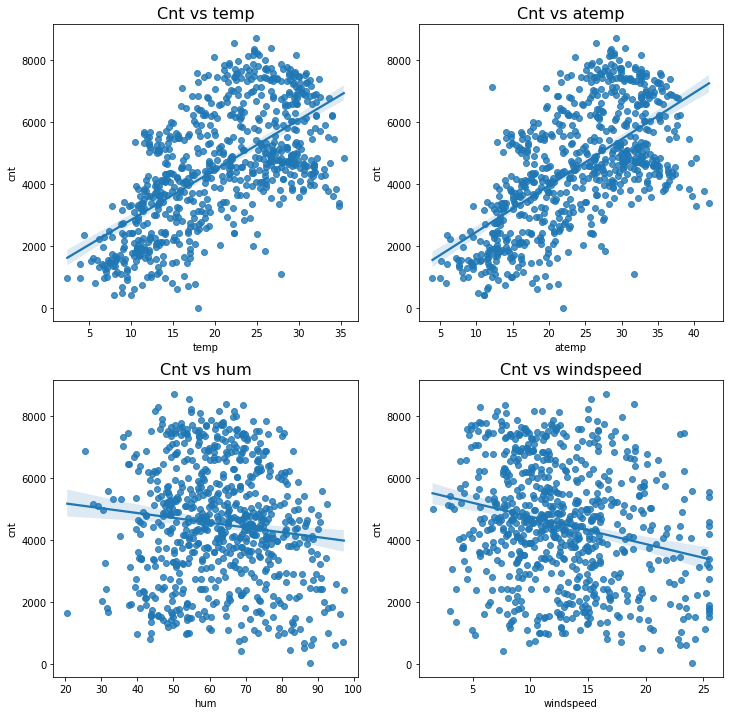

In [3140]:
cols = ['temp', 'atemp','hum', 'windspeed']

plt.figure(figsize=(12,12))
i = 1
for col in cols:
    plt.subplot(2,2,i)
    sns.regplot(data=df,y="cnt",x=col)
    plt.title("Cnt vs " + col,fontsize=16)
    plt.xlabel(col)
    i=i+1

#### Observation
    Linear relationship of temp and atemp with target variable cnt
    Count decreases with humidity
    Count decreases with windspeed

### Boxplot for Categorical Variables

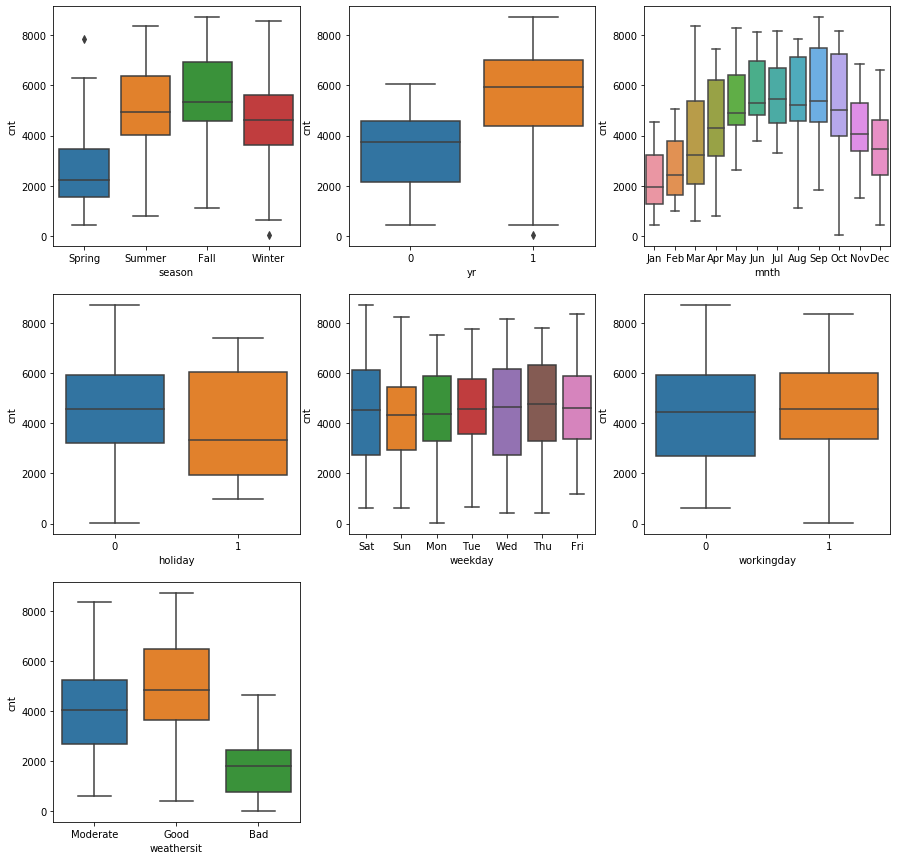

In [3141]:
cols = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(cols):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=df, x=i[1], y='cnt')
plt.show()

Let's plot bar plots for various feature combinations.

#### Bar Plot between count and month over years.

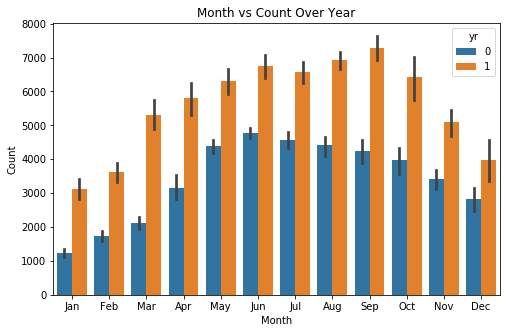

In [3142]:
plt.figure(figsize=(8,5))
ax=sns.barplot(x='mnth', y='cnt', hue="yr", data=df, estimator=np.mean)
ax.set_title('Month vs Count Over Year')
ax.set_ylabel('Count')
ax.set_xlabel('Month')
plt.show()

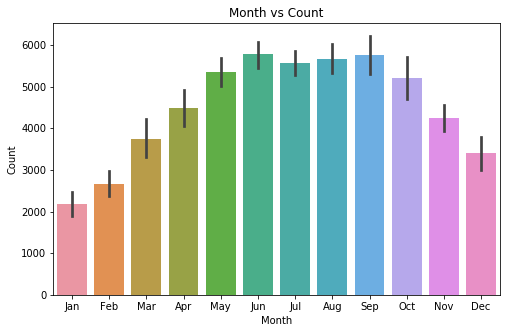

In [3143]:
plt.figure(figsize=(8,5))
ax=sns.barplot(x='mnth', y='cnt', data=df, estimator=np.mean)
ax.set_title('Month vs Count')
ax.set_ylabel('Count')
ax.set_xlabel('Month')
plt.show()

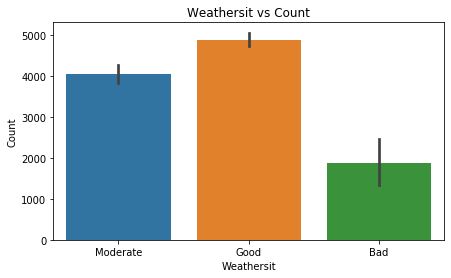

In [3144]:
plt.figure(figsize=(7,4))
ax=sns.barplot(x='weathersit', y='cnt', data=df, estimator=np.mean)
ax.set_title('Weathersit vs Count')
ax.set_ylabel('Count')
ax.set_xlabel('Weathersit')
plt.show()

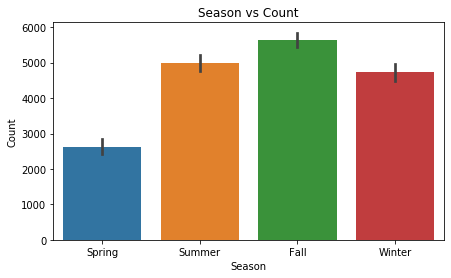

In [3145]:
plt.figure(figsize=(7,4))
ax=sns.barplot(x='season', y='cnt', data=df, estimator=np.mean)
ax.set_title('Season vs Count')
ax.set_ylabel('Count')
ax.set_xlabel('Season')
plt.show()

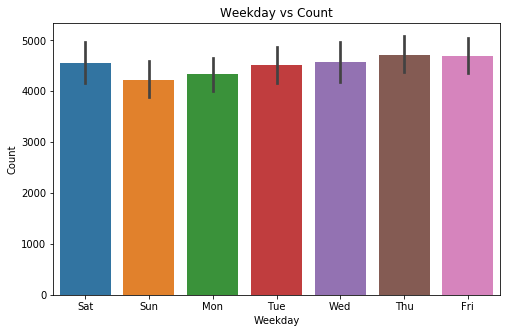

In [3146]:
plt.figure(figsize=(8,5))
ax=sns.barplot(x='weekday', y='cnt', data=df, estimator=np.mean)
ax.set_title('Weekday vs Count')
ax.set_ylabel('Count')
ax.set_xlabel('Weekday')
plt.show()

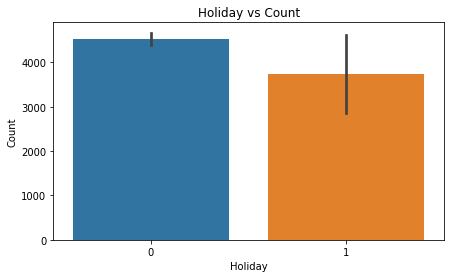

In [3147]:
plt.figure(figsize=(7,4))
ax=sns.barplot(x='holiday', y='cnt', data=df, estimator=np.mean)
ax.set_title('Holiday vs Count')
ax.set_ylabel('Count')
ax.set_xlabel('Holiday')
plt.show()

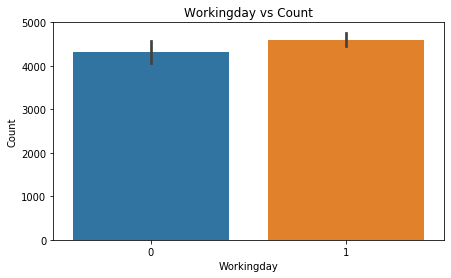

In [3148]:
plt.figure(figsize=(7,4))
ax=sns.barplot(x='workingday', y='cnt', data=df, estimator=np.mean)
ax.set_title('Workingday vs Count')
ax.set_ylabel('Count')
ax.set_xlabel('Workingday')
plt.show()

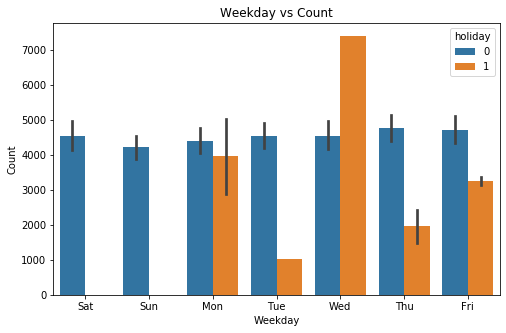

In [3149]:
plt.figure(figsize=(8,5))
ax=sns.barplot(x='weekday', y='cnt',hue='holiday', data=df,estimator=np.mean)
ax.set_title('Weekday vs Count')
ax.set_ylabel('Count')
ax.set_xlabel('Weekday')
plt.show()

#### Observation : All categorical variables
    Year - Demand has significantly increased in the year 2019 compared to 2018
    Season - Demand is high during Fall, followed by Summer, Winter and least during Spring
    Weather Situation - Demand is high when weather condition is good i.e. clear sky, and decreases as it gets mist and cloudy and further decreases during rain and snow.
    Month - Demand is high during the months of Jun, July, Aug and Sept.
    Holiday - Demand decreases during a holiday. It is high during working days.

### Create Dummy Variables

In [3150]:
df = pd.get_dummies(data=df,columns=['season','weathersit','mnth','weekday'],drop_first=True)

In [3151]:
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_Spring', 'season_Summer', 'season_Winter',
       'weathersit_Good', 'weathersit_Moderate', 'mnth_Aug', 'mnth_Dec',
       'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May',
       'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Mon', 'weekday_Sat',
       'weekday_Sun', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

### Split data into train and test

In [3152]:
scaler = StandardScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
df[num_vars] = scaler.fit_transform(df[num_vars])

In [3153]:
y=df.pop('cnt')
X=df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

### RFE - Recursive Feature Elimination

In [3154]:
lm = LinearRegression()

In [3155]:
rfe=RFE(lm,15)
rfe=rfe.fit(X_train,y_train)

In [3156]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 4),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', False, 3),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', False, 7),
 ('season_Winter', True, 1),
 ('weathersit_Good', True, 1),
 ('weathersit_Moderate', True, 1),
 ('mnth_Aug', False, 9),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 10),
 ('mnth_Mar', False, 8),
 ('mnth_May', False, 2),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 15),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 11),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', False, 6),
 ('weekday_Thu', False, 12),
 ('weekday_Tue', False, 13),
 ('weekday_Wed', False, 14)]

In [3157]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'workingday', 'temp', 'windspeed', 'season_Spring',
       'season_Winter', 'weathersit_Good', 'weathersit_Moderate', 'mnth_Dec',
       'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov', 'mnth_Sep',
       'weekday_Sat'],
      dtype='object')

In [3158]:
X_train.columns[~rfe.support_]

Index(['holiday', 'atemp', 'hum', 'season_Summer', 'mnth_Aug', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Oct', 'weekday_Mon', 'weekday_Sun',
       'weekday_Thu', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

In [3159]:
cols=['yr', 'workingday', 'temp', 'windspeed', 'season_Spring',
       'season_Winter', 'weathersit_Good', 'weathersit_Moderate', 'mnth_Dec',
       'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov', 'mnth_Sep',
       'weekday_Sat']

### Build Model

In [3160]:
def build_model(cols,X_train):
    X_train = X_train[cols]
    import statsmodels.api as sm
    X_train = sm.add_constant(X_train)
    lm = sm.OLS(y_train,X_train).fit() 
    print(lm.summary())
    return lm

In [3161]:
def calculate_vif(cols,X_train):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    vif = pd.DataFrame()
    X = X_train[cols]
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

In [3162]:
m1 = build_model(cols,X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          8.64e-189
Time:                        22:36:19   Log-Likelihood:                -253.65
No. Observations:                 510   AIC:                             539.3
Df Residuals:                     494   BIC:                             607.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.6095    

In [3163]:
calculate_vif(cols,X_train)

               Features   VIF
6       weathersit_Good  5.27
4         season_Spring  4.57
1            workingday  4.20
7   weathersit_Moderate  3.38
2                  temp  3.34
5         season_Winter  2.95
10             mnth_Jan  2.34
0                    yr  2.10
9              mnth_Feb  1.95
12             mnth_Nov  1.83
8              mnth_Dec  1.76
14          weekday_Sat  1.68
11             mnth_Jul  1.43
13             mnth_Sep  1.21
3             windspeed  1.08


#### All features are below p value(0.05) and VIF close to 5 acceptable range. Let's first remove mnth_Feb with p=0.025

In [3164]:
cols=['yr', 'workingday', 'temp', 'windspeed', 'season_Spring',
       'season_Winter', 'weathersit_Good', 'weathersit_Moderate', 'mnth_Dec','mnth_Jan', 'mnth_Jul', 'mnth_Nov', 'mnth_Sep',
       'weekday_Sat']

In [3165]:
m2=build_model(cols,X_train)
calculate_vif(cols,X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          7.48e-189
Time:                        22:36:19   Log-Likelihood:                -256.25
No. Observations:                 510   AIC:                             542.5
Df Residuals:                     495   BIC:                             606.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.6150    

#### Removing mnth_Jan with p value = 0.017

In [3166]:
cols=['yr', 'workingday', 'temp', 'windspeed', 'season_Spring',
       'season_Winter', 'weathersit_Good', 'weathersit_Moderate', 'mnth_Dec', 'mnth_Jul', 'mnth_Nov', 'mnth_Sep',
       'weekday_Sat']

In [3167]:
m3=build_model(cols,X_train)
calculate_vif(cols,X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.5
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          8.96e-189
Time:                        22:36:19   Log-Likelihood:                -259.20
No. Observations:                 510   AIC:                             546.4
Df Residuals:                     496   BIC:                             605.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.6218    

#### Removing mnth_Dec with p value = 0.007

In [3168]:
cols=['yr', 'workingday', 'temp', 'windspeed', 'season_Spring',
       'season_Winter', 'weathersit_Good', 'weathersit_Moderate', 'mnth_Jul', 'mnth_Nov', 'mnth_Sep',
       'weekday_Sat']

In [3169]:
m4=build_model(cols,X_train)
calculate_vif(cols,X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     216.1
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          2.18e-188
Time:                        22:36:19   Log-Likelihood:                -262.92
No. Observations:                 510   AIC:                             551.8
Df Residuals:                     497   BIC:                             606.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.6509    

#### Removing mnth_Nov with p value = 0.026

In [3170]:
cols=['yr', 'workingday', 'temp', 'windspeed', 'season_Spring',
       'season_Winter', 'weathersit_Good', 'weathersit_Moderate', 'mnth_Jul', 'mnth_Sep',
       'weekday_Sat']

In [3171]:
m5=build_model(cols,X_train)
calculate_vif(cols,X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     233.4
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.66e-188
Time:                        22:36:19   Log-Likelihood:                -265.47
No. Observations:                 510   AIC:                             554.9
Df Residuals:                     498   BIC:                             605.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.6768    

#### All the features now have 0 p value and hence are significant.

#### Removing weathersit_Moderate with vif >5

In [3172]:
cols=['yr', 'workingday', 'temp', 'windspeed', 'season_Spring',
       'season_Winter', 'weathersit_Moderate', 'mnth_Jul', 'mnth_Sep',
       'weekday_Sat']

In [3173]:
m6=build_model(cols,X_train)
calculate_vif(cols,X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     213.1
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          5.57e-173
Time:                        22:36:20   Log-Likelihood:                -305.00
No. Observations:                 510   AIC:                             632.0
Df Residuals:                     499   BIC:                             678.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.5399    

#### We observe, weathersit_Moderate has changed the coefficient sign from positive to negative(Also the prediction was done on both m6 and m7 models and m7 performance was found better so we keep m7 as our final model). We add back weathersit_Good back and remove workingday as we have weekday_Sat.

In [3174]:
cols=['yr', 'temp', 'windspeed', 'season_Spring',
       'season_Winter', 'weathersit_Good','weathersit_Moderate','weekday_Sat','mnth_Jul','mnth_Sep']

In [3175]:
m7=build_model(cols,X_train)
calculate_vif(cols,X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     240.4
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.26e-183
Time:                        22:36:20   Log-Likelihood:                -279.86
No. Observations:                 510   AIC:                             581.7
Df Residuals:                     499   BIC:                             628.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.4421    

## Model Evaluation

## Residual Analysis

In [3176]:
X_train = X_train[cols]
X_train = sm.add_constant(X_train)

In [3177]:
y_train_pred = m7.predict(X_train)

Text(0.5, 0, 'Errors')

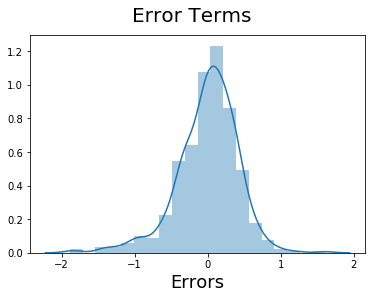

In [3178]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                
plt.xlabel('Errors', fontsize = 18)                      

#### The error terms are normally distributed as per assumption

In [3179]:
X_test = sm.add_constant(X_test)
X_test = X_test[X_train.columns]

In [3180]:
y_pred = m7.predict(X_test)

Text(0, 0.5, 'y_pred')

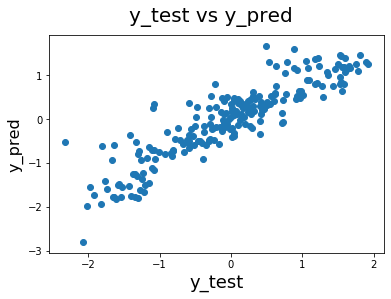

In [3181]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)             
plt.xlabel('y_test', fontsize=18)                        
plt.ylabel('y_pred', fontsize=16)                          

In [3182]:
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [3183]:
print('Test Data Scores')
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Test Data Scores
Mean_Squared_Error : 0.18503887756891252
r_square_value : 0.8052418164186802


In [3184]:
mse = mean_squared_error(y_train, y_train_pred)
r_squared = r2_score(y_train, y_train_pred)

In [3185]:
print('Train Data Scores')
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Train Data Scores
Mean_Squared_Error : 0.17545250093269965
r_square_value : 0.8281025265927056


#### The R2 score for the train and test dataset is less(<3%)

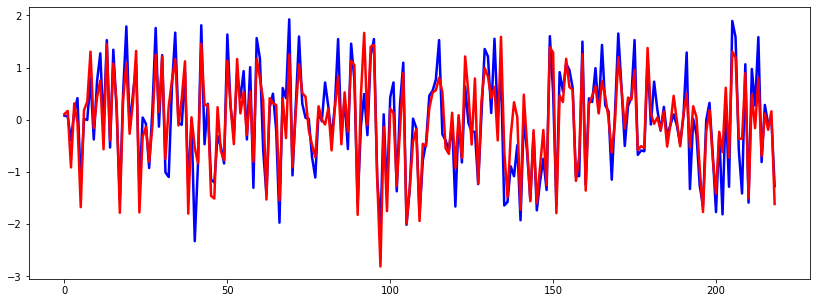

In [3186]:
c = [i for i in range(0,219,1)]
fig = plt.figure(figsize=(14,5))
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
plt.show()

#### The above plots show the predicted values match quite well with the actual values for the unseen test dataset.

Text(0, 0.5, 'Counts - Predicted Counts')

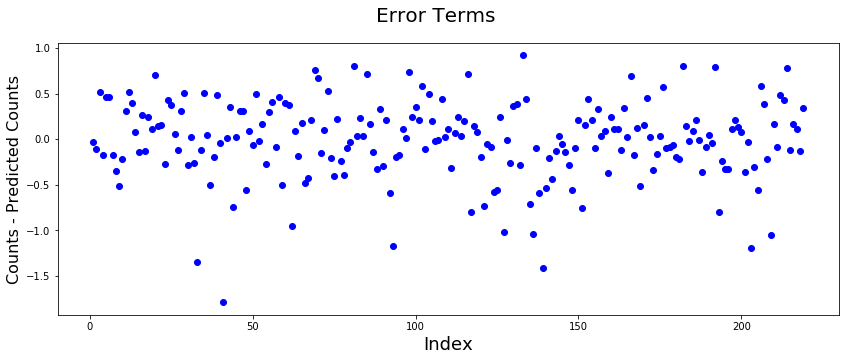

In [3187]:
c = [i for i in range(1,220,1)]
fig = plt.figure(figsize=(14,5))
plt.plot(c,y_test-y_pred, color="blue", marker='o', linewidth=2.5, linestyle="")
fig.suptitle('Error Terms', fontsize=20)               
plt.xlabel('Index', fontsize=18)                      
plt.ylabel('Counts - Predicted Counts', fontsize=16)    

#### There are no visible patterns seen in error terms hence they are independent.
#### The assumption of homoescadacity is also validated from above.

### Inference
    The significant features for the demand prediction are:
        season - The demand will be less during spring and high during fall.
        weathersit - The demand will be higher when the weather is clear. 
        temp - Temprature should not be low.
        yr - There is rise in demand by year
        weekday - Demand is higher on workingdays.
        windspeed - There is less demand when windspeed is more